# Project Group - 21

Members: Naomi Cornelissen, Tom Bruinink, Sam Buisman, Bart van Heijningen, Klaas Molendijk

Student numbers: 5105765, 6075673, 5957915, 6088015, 6101399

# Introduction

Trains are generally seen as an environmental friendly mode of transport. With increased attention from policy makers towards climate change, this mode of transport has become popular (again). The European Union recently announced a plan to improve the railway network in Europe in order to help reduce CO2 emissions on the continent. These plans require great investments, generally financed by (semi-)public organisations and therefore public funds. There are plenty of benefits coming from those investments, with economic growth and sustainability among those.

The primary goal from the sustainability point of view is to move people away from more polluting transport modes and towards train travel. For this to be seen as an effective measure, the amount of passenger kilometres per capita should increase. On the other hand, a long term investment such as a new railroad, should need multiple years to have effect, as the planning and building process takes time.

The economic aspect of the railway investments should be taken into account as well. Not only are the investments a driver for economic growth, the amount of economic growth in a country could also influence the amount of money invested in the railway network. 

Sources: https://www.consilium.europa.eu/en/policies/rail-transport-policy/ ; https://www.jstor.org/stable/j.ctt45kcx6 - CH 10


# Research Objective


The goal of this research is to find relationships between railway investments and the amount of passenger kilometres (pkm) per capita. In order to give an elaborate view of the topic, other relationships are analysed as well. To start, this research will look at the relationship of the growth of gross domestic product (GDP) on passenger railway investment (PRI) relative to GDP. Then this research looks at the average percentage of GDP that goes to PRI over different time periods and the relationship between pkm per capita. Countries with interesting relationships will be analysed further to have a better understanding of implemented policies and see whether other factors can influence the growth in pkm per capita.

### Research question
How do investments in railway infrastructure influence the amount of passenger kilometres?

### Sub-research questions
1. What is the influence of GDP growth on the amount of money a country invests in railway infrastructure?
2. What is the trend of railway investments as a percentage of GDP for the selected countries?
3. What is the trend of passenger kilometers per capita for the selected countries?
4. What is the relationship between railway infrastructure investments per year and the amount of growth in passenger kilometres?
5. To what extend is there a correlation between the investments in railway infrastructure and the growth in passenger kilometres over a period of 20 years?
6. What could be other influences of passenger kilometres growth?


# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**:

**Author 2**:

**Author 3**:

# Data Pipeline

# Research

### Data preparation
In the following code, the data is being prepared and standardized into a consistent format to facilitate computations. A timeframe spanning from 2000 to 2020 is selected, ensuring sufficient data availability across various datasets and encompassing a substantial 20-year period. To maintain data integrity, countries lacking complete data across all datasets throughout this timeframe are excluded. As a result, 15 countries from three different continents are included in the analysis

In [80]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import plotly.express as px

In [81]:
# Import data
prepare_passenger_data = pd.read_csv("passenger_data.csv")
prepare_infrastructure_train_data = pd.read_csv("InfrastructureInvestments_train_data.csv")
prepare_population_data = pd.read_csv("population_data.csv")
gdp_data = pd.read_csv("GDP_data.csv")

# Choose the timeframe you want to consider
start_timeframe = 1999
end_timeframe = 2019

# Part of data is in dollars, other parts in euros or pounds.
# Convert the data to a consistent format by converting everything to dollars.
dollar_euro = 0.95 # current exchange rate
dollar_pounds = 0.82 # current exchange rate

We have filled the passenger, infrastructure, and population tables with all the available data to align their format with the GDP data. However, when displaying the first 10 countries' passenger data, we noticed extensive missing data. Several countries lack any data, while others have information for only a part of the timeframe.

In [82]:
# Prepare data

num_of_countries = gdp_data.shape[0]
num_of_columns = gdp_data.shape[1]

# Make new dataframes in same format as gdp_data and gdp_per_capita_data
gdp_growth_data = pd.DataFrame(columns=gdp_data.columns)
passenger_data = pd.DataFrame(columns=gdp_data.columns)
infrastructure_train_data = pd.DataFrame(columns=gdp_data.columns)
population_data = pd.DataFrame(columns=gdp_data.columns)

# Initialize dataframe
for i in range(num_of_countries):
    gdp_growth_data.loc[i] = ['..' for _ in range(num_of_columns)]
    passenger_data.loc[i] = ['..' for _ in range(num_of_columns)]
    infrastructure_train_data.loc[i] = ['..' for _ in range(num_of_columns)]
    population_data.loc[i] = ['..' for _ in range(num_of_columns)]

# Every row corresponds to data of a country
for i in range(num_of_countries):
    gdp_growth_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]
    passenger_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]
    infrastructure_train_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]
    population_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]

# Fill dataframes with values if they exist
for country in gdp_data["Country"]:
    country_index = gdp_data.loc[gdp_data["Country"] == country].index[0]

    for year in gdp_data.columns[1:]:
        if ((prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))).any():
            if np.isnan(prepare_passenger_data["Value"].iloc[prepare_passenger_data.loc[(prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))].index[0]]) :
                continue
            else:
                passenger_data.loc[country_index,year] = prepare_passenger_data["Value"].iloc[prepare_passenger_data.loc[(prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))].index[0]]
                
        if ((prepare_infrastructure_train_data["LOCATION"] == country) & 
                                      (prepare_infrastructure_train_data["TIME"] == int(year))).any():
            if np.isnan(prepare_infrastructure_train_data["Value"].iloc[prepare_infrastructure_train_data.loc[(prepare_infrastructure_train_data["LOCATION"] == country) & 
                                      (prepare_infrastructure_train_data["TIME"] == int(year))].index[0]]):
                continue
            else:
                infrastructure_train_data.loc[country_index,year] = prepare_infrastructure_train_data["Value"].iloc[prepare_infrastructure_train_data.loc[(prepare_infrastructure_train_data["LOCATION"] == country) & 
                                        (prepare_infrastructure_train_data["TIME"] == int(year))].index[0]]

        if ((prepare_population_data["Code"] == country) & 
                                      (prepare_population_data["Year"] == int(year))).any():
            if np.isnan(prepare_population_data["Population"].iloc[prepare_population_data.loc[(prepare_population_data["Code"] == country) & 
                                      (prepare_population_data["Year"] == int(year))].index[0]]):
                continue
            else:
                population_data.loc[country_index,year] = prepare_population_data["Population"].iloc[prepare_population_data.loc[(prepare_population_data["Code"] == country) & 
                                        (prepare_population_data["Year"] == int(year))].index[0]]

        if year == gdp_data.columns[1] or gdp_data.loc[country_index,year] == ".." or gdp_data.loc[country_index,str(int(year)-1)]  == "..":
            continue
        else:
            gdp_growth_data.loc[country_index,year] = (float(gdp_data.loc[country_index,year]) - float(gdp_data.loc[country_index,str(int(year)-1)])) / float(gdp_data.loc[country_index,str(int(year)-1)]) * 100

passenger_data.head(10)

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ALB,4955.0,5233.0,3721.0,4924.0,5183.0,5299.0,5370.0,6065.0,6495.0,...,7980.0,7637.0,8650.0,..,..,..,..,..,..,..
2,DZA,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,ASM,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,AND,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
5,AGO,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
6,ATG,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
7,ARG,22854.82871,22203.4949,22777.99199,24990.06492,26139.84115,25464.11758,25286.63395,24807.91882,28189.80285,...,43220.01256,44054.44365,42920.52886,43361.32563,44538.45908,46838.665,48784.35137,..,..,..
8,ARM,..,..,1626.0,1643.0,1421.0,1437.0,1678.0,1813.0,1959.0,...,..,..,..,..,..,..,..,..,..,..
9,ABW,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [83]:
# Create empty dataframe to check on what timeframe there is data per country
data_empty = {'Country': [], 'Timeframe passenger': [], 'Timeframe infrastructure': []}
country_timeframe = pd.DataFrame(data_empty)

# Determine timeframe per country for passenger and infrastructure data
for country in gdp_data["Country"]:
    country_index = gdp_data.loc[gdp_data["Country"] == country].index[0]

    passenger_start = 0
    passenger_stop = 0
    passenger_count = 0

    infrastructure_start = 0
    infrastructure_stop = 0
    infrastructure_count = 0
    
    for year in gdp_data.columns[1:]:
        if passenger_data.loc[country_index,year] != ".." and gdp_growth_data.loc[country_index,year] != "..":
            if passenger_start == 0:
                passenger_start = int(year)
            passenger_stop = int(year)
            passenger_count += 1

        if infrastructure_train_data.loc[country_index,year] != ".." and gdp_growth_data.loc[country_index,year] != "..":
            if infrastructure_start == 0:
                infrastructure_start = int(year)
            infrastructure_stop = int(year)
            infrastructure_count += 1

    # Continue if there is no data for a country or there is data missing in between
    if (passenger_stop - passenger_start + 1 != passenger_count or
        infrastructure_stop - infrastructure_start + 1 != infrastructure_count):
        continue

    else:
        new_row = {'Country': country, 'Timeframe passenger': "{}-{}".format(passenger_start,passenger_stop), 'Timeframe infrastructure': "{}-{}".format(infrastructure_start,infrastructure_stop)}
        country_timeframe = country_timeframe.append(new_row, ignore_index=True)

# Create empty list for countries that have data for entire timeframe
feasible_countries = []

for country in country_timeframe["Country"]:
    country_index = country_timeframe.loc[country_timeframe["Country"] == country].index[0]

    years_timeframe_passenger = country_timeframe["Timeframe passenger"].iloc[country_index].split('-')
    years_timeframe_infrastructure = country_timeframe["Timeframe infrastructure"].iloc[country_index].split('-')

    start_year_passenger = int(years_timeframe_passenger[0])
    end_year_passenger = int(years_timeframe_passenger[1])

    start_year_infrastructure = int(years_timeframe_infrastructure[0])
    end_year_infrastructure = int(years_timeframe_infrastructure[1])

    # Add countries to feasible_countries if data is available on entire timeframe for both passengers and infrastructure
    if (max(start_year_passenger,start_year_infrastructure) <= start_timeframe) & (min(end_year_passenger,end_year_infrastructure) >= end_timeframe):
        feasible_countries.append(country)

# Drop all years from dataframe that are not in timeframe
for year in gdp_data.columns[1:]:
    if int(year) < start_timeframe or int(year) > end_timeframe:
        gdp_data = gdp_data.drop(year, axis=1)
        gdp_growth_data = gdp_growth_data.drop(year, axis=1)
        passenger_data = passenger_data.drop(year, axis=1)
        population_data = population_data.drop(year, axis=1)
        infrastructure_train_data = infrastructure_train_data.drop(year, axis=1)

# Drop all countries from dataframe that are not in feasible countries
gdp_data = gdp_data[gdp_data['Country'].isin(feasible_countries)]
gdp_growth_data = gdp_growth_data[gdp_growth_data['Country'].isin(feasible_countries)]
passenger_data = passenger_data[passenger_data['Country'].isin(feasible_countries)]
population_data = population_data[population_data['Country'].isin(feasible_countries)]
infrastructure_train_data = infrastructure_train_data[infrastructure_train_data['Country'].isin(feasible_countries)]


In [84]:
# Set countries as index to make plotting easier
gdp_data.set_index('Country', inplace=True)
gdp_data = gdp_data.applymap(lambda x: '{:.0f}'.format(float(x)))  # Convert large numbers (e-powers) to normal numbers
gdp_growth_data.set_index('Country', inplace=True)
passenger_data.set_index('Country', inplace=True)
population_data.set_index('Country', inplace=True)
infrastructure_train_data.set_index('Country', inplace=True)

infrastructure_train_data = infrastructure_train_data / dollar_euro # Convert data from euros to dollars

gdp_data.to_csv("gdp_new.csv",index=True)
passenger_data.to_csv('passenger_new.csv', index=True)
population_data.to_csv("population_new.csv",index=True)
infrastructure_train_data.to_csv("infrastructure_train_new.csv",index=True)

Descriptive statistics

The figures and table below present the data for the 17 countries for which all data is available. In the first figure the 

the averages of the input data from 1999 up to 2019 for the 17 countries for which all data is available. In this overview the differences between countries can be observed.

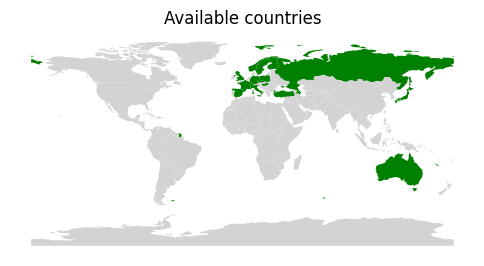

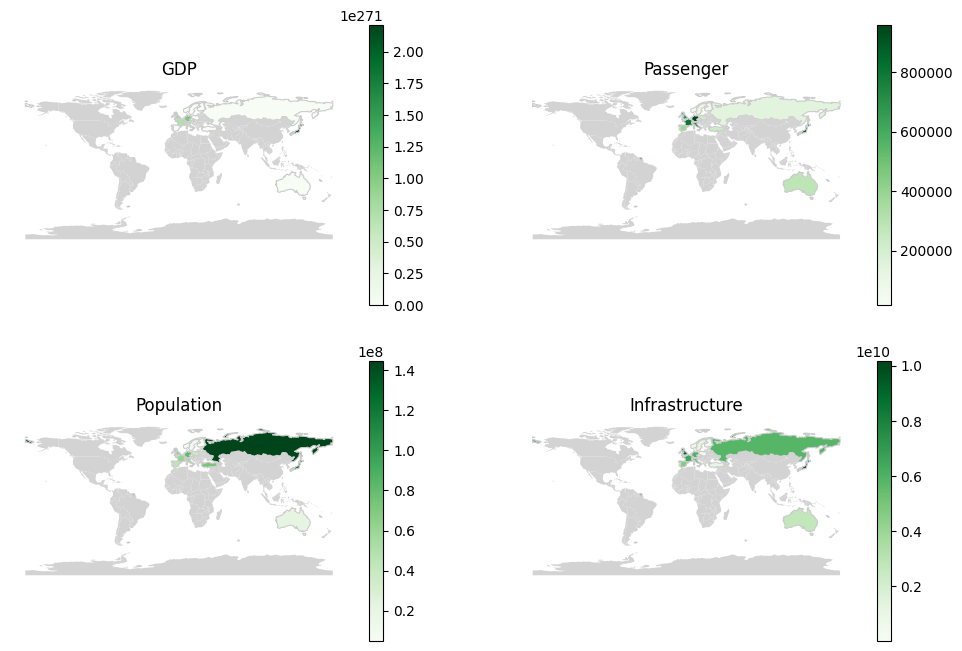

,GDP,Population,Passenger kilometers (in millions),Investments in train infrastructure
Country,,,,
AUS,1.852381e+261,2.177023e+07,282674.851510,2.722857e+09
AZE,2.181546e+223,9.148406e+06,16491.047619,6.467928e+06
CZE,3.103478e+246,1.039725e+07,78474.819048,5.990470e+08
FIN,6.428571e+249,5.343337e+06,70153.428571,3.990977e+08
FRA,7.095238e+270,6.179288e+07,798211.571429,6.504438e+09
DEU,1.042857e+271,8.169711e+07,959291.952381,6.043788e+09
HUN,2.336827e+245,9.990300e+06,70439.227829,4.102794e+08
ITA,5.952381e+270,5.895858e+07,788532.761905,5.710276e+09
JPN,2.209524e+271,1.273752e+08,914266.571429,1.017411e+10


In [86]:
# Visualize the data over different countries

# world map data
world_map = gpd.read_file("ne_110m_admin_0_countries.shp")   

# Rename index of countries in world map data
world_map = world_map.rename(columns={"SOV_A3": "Country"})

change_names_dict = {"AU1": "AUS", "GB1": "GBR", "FI1": "FIN", "FR1": "FRA"}

world_map["Country"] = world_map["Country"].replace(change_names_dict)

# Adding column
world_map['has_value'] = world_map['Country'].isin(gdp_data.index)

# Merge data
gdp_world_map = world_map.merge(gdp_data, on="Country")
passenger_world_map = world_map.merge(passenger_data, on="Country")
population_world_map = world_map.merge(population_data, on="Country")
infrastructure_world_map = world_map.merge(infrastructure_train_data, on="Country")

# Plot of countries with available data
fig1, ax1 = plt.subplots(figsize=(6, 4))
world_map[world_map['has_value'] == True].plot(color='green', ax=ax1)
world_map[world_map['has_value'] == False].plot(color='lightgray', ax=ax1)
ax1.set_title('Available countries')
ax1.axis('off')
plt.show()


# 2x2 subplot
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Calculate mean of data over timeframe
average_gdp = gdp_world_map.loc[:, str(start_timeframe):str(end_timeframe)].mean(axis=1)
average_passenger = passenger_world_map.loc[:, str(start_timeframe):str(end_timeframe)].mean(axis=1)
average_population = population_world_map.loc[:, str(start_timeframe):str(end_timeframe)].mean(axis=1)
average_infrastructure = infrastructure_world_map.loc[:, str(start_timeframe):str(end_timeframe)].mean(axis=1)

gdp_world_map.plot(column=average_gdp, cmap='Greens', linewidth=0.8, ax=ax[0, 0], edgecolor='0.8', legend=True)
world_map[world_map['has_value'] == False].plot(color='lightgray', ax=ax[0, 0])

passenger_world_map.plot(column=average_passenger, cmap='Greens', linewidth=0.8, ax=ax[0, 1], edgecolor='0.8', legend=True)
world_map[world_map['has_value'] == False].plot(color='lightgray', ax=ax[0, 1])

population_world_map.plot(column=average_population, cmap='Greens', linewidth=0.8, ax=ax[1, 0], edgecolor='0.8', legend=True)
world_map[world_map['has_value'] == False].plot(color='lightgray', ax=ax[1, 0])

infrastructure_world_map.plot(column=average_infrastructure, cmap='Greens', linewidth=0.8, ax=ax[1, 1], edgecolor='0.8', legend=True)
world_map[world_map['has_value'] == False].plot(color='lightgray', ax=ax[1, 1])

# Set titles and turn off axis for subplots
ax[0, 0].set_title('GDP')
ax[0, 0].axis('off')

ax[0, 1].set_title('Passenger')
ax[0, 1].axis('off')

ax[1, 0].set_title('Population')
ax[1, 0].axis('off')

ax[1, 1].set_title('Infrastructure')
ax[1, 1].axis('off')

plt.show()


# Descriptive statistics

#check if the data is imported correctly
infrastructure_train_data.head()
population_data.head()
passenger_data.head()
gdp_data.head()

#Calculate average over the 20 years in a new column, and then drop all original data
#except for the generated column containing the average.
#Also give a fitting name to this new column. This is repeated for all relevant input data.

new_infrastructure_train_data = infrastructure_train_data.loc[:, str(start_timeframe):str(end_timeframe)].mean(axis=1)
new_infrastructure_train_data = new_infrastructure_train_data.drop(columns=range(start_timeframe, end_timeframe+1))
infrastructure_train_mean = pd.DataFrame({'Investments in train infrastructure': new_infrastructure_train_data})

new_population_data = population_data.loc[:, str(start_timeframe):str(end_timeframe)].mean(axis=1)
new_population_data = new_population_data.drop(columns=range(start_timeframe, end_timeframe+1))
population_mean = pd.DataFrame({'Population': new_population_data})

new_passenger_data = passenger_data.loc[:, str(start_timeframe):str(end_timeframe)].mean(axis=1)
new_passenger_data = new_passenger_data.drop(columns=range(start_timeframe, end_timeframe+1))
passenger_mean = pd.DataFrame({'Passenger kilometers (in millions)': new_passenger_data})

new_gdp_data = gdp_data.loc[:, str(start_timeframe):str(end_timeframe)].mean(axis=1)
new_gdp_data = new_gdp_data.drop(columns=range(start_timeframe, end_timeframe+1))
gdp_mean = pd.DataFrame({'GDP': new_gdp_data})

#Merge all the dataframes for all the means by first adding them to a list and then concatenating them
dataframes_to_be_merged = [gdp_mean, population_mean, passenger_mean, infrastructure_train_mean]
descriptive_table = pd.concat(dataframes_to_be_merged, axis=1)
descriptive_table = descriptive_table.reset_index()
descriptive_table = descriptive_table.rename(columns={'index': 'Country'})

descriptive_table.set_index('Country', inplace = True)
display(descriptive_table)

### Relative investment in railway infrastructure
The figure below illustrates the relation between the growth in GDP and the proportional investment in railway infrastructure concerning a country's GDP from 1999 to 2019. Notably, these investments typically fall within the range of 0% to 0.6% of the GDP across various countries. It can be observed that there is no clear link between the GDP growth and the investments. Furthermore, the data shows considerable fluctuations over time, suggesting a lack of consistent patterns. There is no clear distinction between nations consistently investing heavily in railway projects and those that do not.

In [ ]:
# Convert data to float such that matrixes can be divided by eachother
infrastructure_train_data = infrastructure_train_data.astype(float)
gdp_data = gdp_data.astype(float)
passenger_data = passenger_data.astype(float)
population_data = population_data.astype(float)

In [ ]:
# Determine percentage of GDP that is invested in railway infrastructure
infrastructure_gdp = infrastructure_train_data / gdp_data * 100

years = infrastructure_gdp.columns[:]

data = []
for year in years:
    for country in infrastructure_gdp.index:
        data.append({
            'Year': year,
            'Country': country,
            'GDP growth': gdp_growth_data.loc[country, year],
            'Investments': infrastructure_gdp.loc[country, year]
        })

marker_size = 20

# Create an animated scatter plot using Plotly Express
fig = px.scatter(data_frame=data, x='GDP growth', y='Investments', animation_frame='Year', size=[marker_size]*len(data), size_max=10,
                 color='Country', hover_name='Country', range_x=[0.95 * gdp_growth_data.values.min(), 1.05 * gdp_growth_data.values.max()],
                 range_y=[0, 1.05 * infrastructure_gdp.values.max()], labels={'GDP growth': 'GDP growth', 'Investments': 'Investments'})

# Customize the layout
fig.update_layout(title='GDP growth vs. Investments Over the Years',
                  xaxis_title='GDP growth', yaxis_title='Investments')

# Show the plot
fig.show()


### Travel distance per person
In the figure below, we show the railway distance traveled per person for each country from 2000 to 2020. Distances range widely, from 1500 to 14000 kilometers. The data remains consistent over time, revealing three distinct groups: countries with low travel (under 5000 km), moderate travel (6000 to 9000 km), and high travel (over 10000 km). There is a significant decrease in 2020 for all countries, likely due to Covid-19 restrictions.

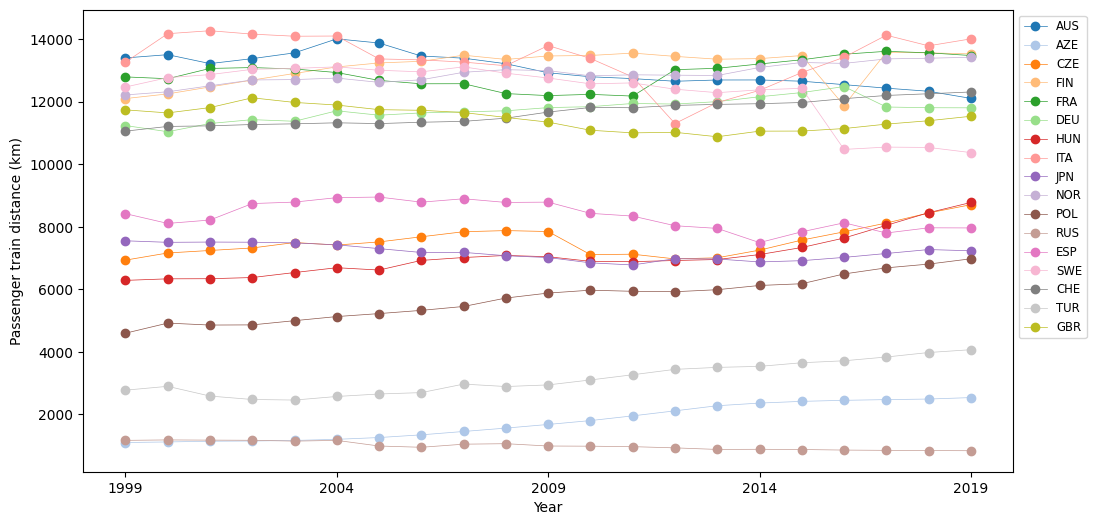

In [ ]:
# Determine amount of kilometers travelled per passenger
# Note that passenger data is the total amount of kilometers travelled in millions
km_per_passenger = passenger_data / population_data * 1000000

# Create figure
plt.figure(figsize=(12, 6))

# Plot every country
for i, (index, row) in enumerate(km_per_passenger.iterrows()):
    plt.plot(row.index, row.values, marker='o', label=f'{index}', linewidth=0.5, color=plt.cm.tab20(i))

# Adjust years on x-axis for visibility
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

plt.xlabel('Year')
plt.ylabel('Passenger train distance (km)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.show()

### Influence previous investments on passenger growth
The figure below shows the relation of investments in railway infrastructure (corrected by GDP) and the amount of kilometers travelled per passenger. 
Every year from 2005 onwards, we look at the investments made in the 5 years before and look at what the impact has been on the travelled kilometers, for each country. 
In this way, we want to analyze if the investments in railway lead to more train passengers. 
As we look at the outcome of the graphs, we see that it not shows what we expected, meaning that the investments in the long term do not seem to increase over a long period. 
This can have different reasons, for instance in this graph we do not look at the investments in other segments like air transportation and road transportation.


In [ ]:
# Calculate rolling average for each year based on the past 5 years
investments_over_years = infrastructure_gdp.shift(axis=1).rolling(window=5,axis=1, min_periods=1).mean()
passenger_growth = km_per_passenger.pct_change(periods=5, axis=1)*100

# Since the rolling average starts from the fifth year, remove the first 4 years 
for year in investments_over_years.columns[:5]:
    investments_over_years = investments_over_years.drop(year, axis=1)

for year in passenger_growth.columns[:5]:
    passenger_growth = passenger_growth.drop(year, axis=1)

#make new dataframes
df1 = pd.DataFrame(investments_over_years)
df2 = pd.DataFrame(passenger_growth)

years_investments = df2.columns[:]

data = []
for year in years_investments:
    for country in df1.index:
        data.append({
            'Year': year,
            'Country': country,
            'Investments': df1.loc[country, year],
            'Passengers': df2.loc[country, year]
        })

marker_size = 20

# Scatter plot
fig = px.scatter(data_frame=data, x='Investments', y='Passengers', animation_frame='Year', size=[marker_size]*len(data), size_max=10,
                 color='Country', hover_name='Country', range_x=[0, 1.05 * df1.values.max()],
                 range_y=[0.95 * df2.values.min(), 1.05 * df2.values.max()], labels={'Investments': 'Investments', 'Passengers': 'Passengers'},)

# Layout
fig.update_layout(title='Investments vs. Passengers Over the Years',
                  xaxis_title='Investments in railway infrastructure corrected by GDP ', yaxis_title='Kilometers traveled per passengers')

# Show the plot
fig.show()

### Influence of total investments on passenger growth
The figure below shows the relation between railway infrastructure investments (corrected by GDP) and the growth of the average distance travelled per passenger.
In this figure we decided to aggregate all data from 2000-2020 in one figure. 
The passenger growth is from 2000-2020, but we excluded the final year of investments, since the effects of the investments could only affect passenger levels after 2020.
As we look at the outcome of the graphs, we see that it not shows what we expected, meaning that the investments in the long term do not seem to increase over a long period. 
This can have different reasons, for instance we did not take other factors into account that might effect the passenger levels such as affordability, economic development and competing modes of transport to name a few.

In [ ]:
# Exclude the 2020 data of investments before we determine the average
infrastructure_gdp_up_to_2019 = infrastructure_gdp.iloc[:, :-1]

# Determine the average for all years of the infrastructure data
year_average_infrastructure_gdp_up_to_2019 = infrastructure_gdp_up_to_2019.mean(axis=1)

# Select columns from 2000 to 2020 from the kilometers per passenger data
km_per_passengers_2000_2020 = km_per_passenger.loc[:, '2000':'2020']

# Calculate percentage growth for each country
passenger_growth = ((km_per_passengers_2000_2020.iloc[:, -1] - km_per_passengers_2000_2020.iloc[:, 0]) / km_per_passengers_2000_2020.iloc[:, 0]) * 100

# Investments year average comparing with passenger transport year average dataframe making
df3 = pd.DataFrame({'Country': year_average_infrastructure_gdp_up_to_2019.index, 'Investments average': year_average_infrastructure_gdp_up_to_2019})
df4 = pd.DataFrame({'Country': passenger_growth.index, 'Passenger growth': passenger_growth.values})

# Drop the existing "Country" column, if it exists
if 'Country' in df3.columns:
    df3 = df3.drop('Country', axis=1)

# Reset the index of df3 to make "Country" a regular column
df3_reset = df3.reset_index()

# Reset the index of df4 to make "Country" a regular column
df4_reset = df4.reset_index()

# Merge the two DataFrames based on the "Country" column
df5 = pd.merge(df3_reset, df4_reset, left_on='Country', right_on='Country')

df5 = df5.drop(df5.columns[2], axis=1)

# Create a scatter plot using Plotly Express
fig = px.scatter(df5, x='Investments average', y='Passenger growth', color= 'Country',
                 title='Scatter Plot for Average Values', labels={'Investments': 'Average Investments', 'Passengers': 'Average Passengers'})

# Customize the layout
fig.update_layout(title='Investments vs. Passengers average over the years',
                  xaxis_title='Average Investments in railway infrastructure corrected by GDP', yaxis_title='Growth of kilometres travelled per passenger')

# Show the plot
fig.show()


# Other drivers for passenger growth

As the analysis in the previous paragraphs shows, there is not a clear correlation between investments in railway infrastructure and the passenger growth. This can either mean that railway infrastructure investments do not lead to a growth in passenger growth, or that there are other factors in play which influence passenger kilometer levels. 

Four different factors that could possibly correlate with passenger kilometer levels have been identified, namely democracy, interconnectivity, safety and affordability. It must be noted that not all these factors cover the time span used previously and that some observed countries are not part of the data used for these factors.

Democracy

When analysing the maps displaying the democracy index, or the kilometers travelled by train some visual similarities can be discovered. Therefore, the democracy index is expected to show similarity with the performed division of countries made by kilometers travelled by train. 

Interconnectivity

A dense interconnected railway network provides more connections and travel options. Therefore, the train will form a favourable option for more trajectories. Therefore, the density of railway lines is expected to show similarity with the performed division of countries by kilometers travelled by train (Yang et all, 2021). Australia and Japan are omitted because the used data does not cover these countries.

Safety

A safer railway network will make the network more reliable, and that people will trust the system more. Therefore, the safety of the railway network is expected to show similarity with the performed division of countries by kilometers travelled by train (European union agency for railways, 2020). Australia, Azerbaijan, Japan and Russia are omitted because the used data does not cover these countries.

Affordability

 Pricing is an important factor in enhancing the attractiveness of train travel. It has been demonstrated in the case of Germany that lowering ticket prices resulted in a notable 25% increase in train passengers (Euronews, 2023). Lower fares are expected to stimulate greater use of train services by making them more accessible and affordable to a wider audience. Therefore, train fares are expected to show similarity with the performed division of countries by kilometers travelled by train. Australia and Japan are omitted because the used data does not cover these countries.

In [ ]:
# Import data
prepare_democracy_index_data = pd.read_csv("democracy-index-eiu.csv")
prepare_railway_line_density_data = pd.read_csv("Railway_line_density.csv")
prepare_area_land = pd.read_csv("land-area-km.csv")
prepare_safety = pd.read_csv("safety_total.csv")
prepare_train_fares = pd.read_csv("Train fares.csv")

prepare_railway_line_density_data.set_index('Country Code', inplace=True)
prepare_train_fares.set_index('Code', inplace=True)

num_of_countries = gdp_data.shape[0]
num_of_columns = gdp_data.shape[1]

# Make new dataframes in same format as gdp_data and gdp_per_capita_data
democracy_index_data = pd.DataFrame(columns=gdp_data.columns, index=gdp_data.index)
railway_line_density_data = pd.DataFrame(columns=gdp_data.columns, index=gdp_data.index)
land_area_km = pd.DataFrame(columns=gdp_data.columns, index=gdp_data.index)
safety_data = pd.DataFrame(columns=gdp_data.columns, index=gdp_data.index)
train_fares = pd.DataFrame(columns=gdp_data.columns, index=gdp_data.index)

# Initialize dataframe
for country in gdp_data.index:
    for year in gdp_data.columns[:]:
        democracy_index_data.loc[country,year] = ".."
        railway_line_density_data.loc[country,year] = ".."
        land_area_km.loc[country,year] = ".."
        safety_data.loc[country,year] = ".."
        train_fares.loc[country,year] = ".."

# Fill dataframes with values if they exist
for country in gdp_data.index:
    country_index = gdp_data.loc[gdp_data.index == country].index[0]

    for year in gdp_data.columns[:]:
        if ((prepare_democracy_index_data["Code"] == country) & 
                                      (prepare_democracy_index_data["Year"] == int(year))).any():
            if np.isnan(prepare_democracy_index_data["democracy_eiu"].iloc[prepare_democracy_index_data.loc[(prepare_democracy_index_data["Code"] == country) & 
                                      (prepare_democracy_index_data["Year"] == int(year))].index[0]]) :
                pass
            else:
                democracy_index_data.loc[country_index,year] = prepare_democracy_index_data["democracy_eiu"].iloc[prepare_democracy_index_data.loc[(prepare_democracy_index_data["Code"] == country) & 
                                      (prepare_democracy_index_data["Year"] == int(year))].index[0]]
        else:
            if ((prepare_democracy_index_data["Code"] == country) & 
                        (prepare_democracy_index_data["Year"] == int(year)+1)).any() and ((prepare_democracy_index_data["Code"] == country) & 
                        (prepare_democracy_index_data["Year"] == int(year)-1)).any():
                if np.isnan(prepare_democracy_index_data["democracy_eiu"].iloc[prepare_democracy_index_data.loc[(prepare_democracy_index_data["Code"] == country) & 
                                      (prepare_democracy_index_data["Year"] == int(year)+1)].index[0]]) or np.isnan(prepare_democracy_index_data["democracy_eiu"].iloc[prepare_democracy_index_data.loc[(prepare_democracy_index_data["Code"] == country) & 
                                      (prepare_democracy_index_data["Year"] == int(year)-1)].index[0]]):
                    pass
                else:
                    democracy_index_data.loc[country_index,year] = (prepare_democracy_index_data["democracy_eiu"].iloc[prepare_democracy_index_data.loc[(prepare_democracy_index_data["Code"] == country) & 
                                      (prepare_democracy_index_data["Year"] == int(year)-1)].index[0]] + prepare_democracy_index_data["democracy_eiu"].iloc[prepare_democracy_index_data.loc[(prepare_democracy_index_data["Code"] == country) & 
                                      (prepare_democracy_index_data["Year"] == int(year)+1)].index[0]]) / 2
   
        for column in prepare_railway_line_density_data.columns:
            if year in column:
                if prepare_railway_line_density_data.loc[country,column] != "..":
                    railway_line_density_data.loc[country,year] = prepare_railway_line_density_data.loc[country,column]

        if ((prepare_area_land["Code"] == country) & 
                                      (prepare_area_land["Year"] == int(year))).any():
            if np.isnan(prepare_area_land["Land area (sq. km)"].iloc[prepare_area_land.loc[(prepare_area_land["Code"] == country) & 
                                      (prepare_area_land["Year"] == int(year))].index[0]]) :
                pass
            else:
                land_area_km.loc[country_index,year] = prepare_area_land["Land area (sq. km)"].iloc[prepare_area_land.loc[(prepare_area_land["Code"] == country) & 
                                      (prepare_area_land["Year"] == int(year))].index[0]]
                
        if ((prepare_safety["geo"] == country) & 
                                      (prepare_safety["TIME_PERIOD"] == int(year))).any():
            if np.isnan(prepare_safety["OBS_VALUE"].iloc[prepare_safety.loc[(prepare_safety["geo"] == country) & 
                                      (prepare_safety["TIME_PERIOD"] == int(year))].index[0]]) :
                pass
            else:
                safety_data.loc[country_index,year] = prepare_safety["OBS_VALUE"].iloc[prepare_safety.loc[(prepare_safety["geo"] == country) & 
                                      (prepare_safety["TIME_PERIOD"] == int(year))].index[0]]

        if int(year) == 2019 and country in prepare_train_fares.index:
            # Convert train fares from pounds to dollars
            train_fares.loc[country,year] = float(prepare_train_fares.loc[country,"Price Per Mile (£)"].replace('£', '')) / dollar_pounds

        

In [ ]:
# Create a index of years with steps of 5 years
years = []
for year in range(start_timeframe, end_timeframe+1, 5):
    years.append(year)

# Determine number of countries
country_count = len(gdp_data.index)

# Create groups by amount of passenger kilometers per capita
group1 = []  # Group with less than 4000 kilometres per capita in first year of time frame
group2 = []  # Group with between 4000 and 10000 kilometres per capita in first year of time frame
group3 = []  # Group with more than 10000 kilometres per capita in first year of time frame
for country in km_per_passenger.index:
    if km_per_passenger.loc[country, str(start_timeframe)] < 4000:
        group1.append(country)
    elif km_per_passenger.loc[country, str(start_timeframe)] >=4000 and km_per_passenger.loc[country, str(start_timeframe)] <10000:
        group2.append(country)
    else:
        group3.append(country)

In [ ]:
# Determine relation between democracy index and passenger kilometers groups

# Create lists for the values in each group per year
group1_democracy_data = []  # Group 1 data for each year
group2_democracy_data = []  # Group 2 data for each year
group3_democracy_data = []  # Group 3 data for each year

democracy_years = []
democracy_countries = []
for year in years:
    count = 0

    for country in democracy_index_data.index:
        # Check whether data is available
        if democracy_index_data.loc[country, str(year)] == "..":
            count += 1

    # If enough data is available, add year to time span
    if count / country_count < 0.5:
        democracy_years.append(year)

    # Else go to next year in range
    else:
        continue
    
    # Check for every country is data is available in that year
    for country in democracy_index_data.index:
        if democracy_index_data.loc[country, str(year)] == "..":

            # Remove country if data not available
            if country in democracy_countries:
                democracy_countries.remove(country)
        
        # If data is available for first time period in time span
        else:
            if len(democracy_years) == 1:
                democracy_countries.append(country)


# Calculate an average value per year for each group of countries
for year in democracy_years:
    group1_average_democracy = []
    group2_average_democracy = []
    group3_average_democracy = []
    for country in democracy_countries:
        if country in group1:
            group1_average_democracy.append(democracy_index_data.loc[country, str(year)])
        elif country in group2:
            group2_average_democracy.append(democracy_index_data.loc[country, str(year)])
        elif country in group3:
            group3_average_democracy.append(democracy_index_data.loc[country, str(year)])
    group1_democracy_data.append(sum(group1_average_democracy) / len(group1_average_democracy))
    group2_democracy_data.append(sum(group2_average_democracy) / len(group2_average_democracy))
    group3_democracy_data.append(sum(group3_average_democracy) / len(group3_average_democracy))

In [ ]:
# Determine relation between line density and passenger kilometers groups

# Create lists for the values in each group per year
group1_line_density_data = []  # Group 1 data for each year
group2_line_density_data = []  # Group 2 data for each year
group3_line_density_data = []  # Group 3 data for each year

line_density_years = []
line_density_countries = []
for year in years:
    count = 0

    for country in railway_line_density_data.index:
        # Check whether data is available
        if railway_line_density_data.loc[country, str(year)] == "..":
            count += 1

    # If enough data is available, add year to time span
    if count / country_count < 0.5:
        line_density_years.append(year)

    # Else go to next year in range
    else:
        continue
    

    # Check for every country is data is available in that year
    for country in railway_line_density_data.index:
        if railway_line_density_data.loc[country, str(year)] == "..":

            # Remove country if data not available
            if country in line_density_countries:
                line_density_countries.remove(country)

        # If data is available for first time period in time span
        else:
            if len(line_density_years) == 1:
                line_density_countries.append(country)

# Calculate an average value per year for each group of countries
for year in line_density_years:
    group1_average_line_density = []
    group2_average_line_density = []
    group3_average_line_density = []
    for country in line_density_countries:

        if country in group1:
            group1_average_line_density.append(float(railway_line_density_data.loc[country, str(year)])/float(land_area_km.loc[country, str(year)]))
        elif country in group2:
            group2_average_line_density.append(float(railway_line_density_data.loc[country, str(year)])/float(land_area_km.loc[country, str(year)]))
        elif country in group3:
            group3_average_line_density.append(float(railway_line_density_data.loc[country, str(year)])/float(land_area_km.loc[country, str(year)]))

    group1_line_density_data.append(sum(group1_average_line_density) / len(group1_average_line_density))
    group2_line_density_data.append(sum(group2_average_line_density) / len(group2_average_line_density))
    group3_line_density_data.append(sum(group3_average_line_density) / len(group3_average_line_density))



In [ ]:
# Determine relation between number of accidents and passenger kilometers groups

# Create lists for the values in each group per year
group1_safety_data = []  # Group 1 data for each year
group2_safety_data = []  # Group 2 data for each year
group3_safety_data = []  # Group 3 data for each year

safety_years = []
safety_countries = []

for year in years:

    # For group 1, only data is available for Russia in 2018 & 2019, for other countries no data is available
    if year not in (2018,2019):
        continue

    count = 0

    for country in safety_data.index:
        # Check whether data is available
        if safety_data.loc[country, str(year)] == "..":
            count += 1

    # If enough data is available, add year to time span
    if count / country_count < 0.5:
        safety_years.append(year)

    # Else go to next year in range
    else:
        continue
    
    
    # Check for every country is data is available in that year
    for country in safety_data.index:
        if safety_data.loc[country, str(year)] == "..":

            # Remove country if data not available
            if country in safety_countries:
                safety_countries.remove(country)

        # If data is available for first time period in time span
        else:
            if len(safety_years) == 1:
                safety_countries.append(country)


# Calculate an average value per year for each group of countries
for year in safety_years:
    group1_average_safety = []
    group2_average_safety = []
    group3_average_safety = []
    for country in safety_countries:

        if country in group1:
            group1_average_safety.append(float(safety_data.loc[country, str(year)])/float(passenger_data.loc[country, str(year)]))
        elif country in group2:
            group2_average_safety.append(float(safety_data.loc[country, str(year)])/float(passenger_data.loc[country, str(year)]))
        elif country in group3:
            group3_average_safety.append(float(safety_data.loc[country, str(year)])/float(passenger_data.loc[country, str(year)]))

    group1_safety_data.append(sum(group1_average_safety) / len(group1_average_safety))
    group2_safety_data.append(sum(group2_average_safety) / len(group2_average_safety))
    group3_safety_data.append(sum(group3_average_safety) / len(group3_average_safety))

In [ ]:
# Determine relation between train fares and passenger kilometers groups

# Create lists for the values in each group per year
group1_train_fares_data = []  # Group 1 data for each year
group2_train_fares_data = []  # Group 2 data for each year
group3_train_fares_data = []  # Group 3 data for each year

train_fares_years = []
train_fares_countries = []

for year in years:
    count = 0

    for country in train_fares.index:
        # Check whether data is available
        if train_fares.loc[country, str(year)] == "..":
            count += 1

    # If enough data is available, add year to time span
    if count / country_count < 0.5:
        train_fares_years.append(year)

    # Else go to next year in range
    else:
        continue
    

    # Check for every country is data is available in that year
    for country in train_fares.index:
        if train_fares.loc[country, str(year)] == "..":

            # Remove country if data not available
            if country in train_fares_countries:
                train_fares_countries.remove(country)

        # If data is available for first time period in time span
        else:
            if len(train_fares_years) == 1:
                train_fares_countries.append(country)

# Calculate an average value per year for each group of countries
for year in train_fares_years:
    group1_average_train_fares = []
    group2_average_train_fares = []
    group3_average_train_fares = []
    for country in line_density_countries:

        if country in group1:
            group1_average_train_fares.append(float(train_fares.loc[country, str(year)]))
        elif country in group2:
            group2_average_train_fares.append(float(train_fares.loc[country, str(year)]))
        elif country in group3:
            group3_average_train_fares.append(float(train_fares.loc[country, str(year)]))

    group1_train_fares_data.append(sum(group1_average_train_fares) / len(group1_average_train_fares))
    group2_train_fares_data.append(sum(group2_average_train_fares) / len(group2_average_train_fares))
    group3_train_fares_data.append(sum(group3_average_train_fares) / len(group3_average_train_fares))



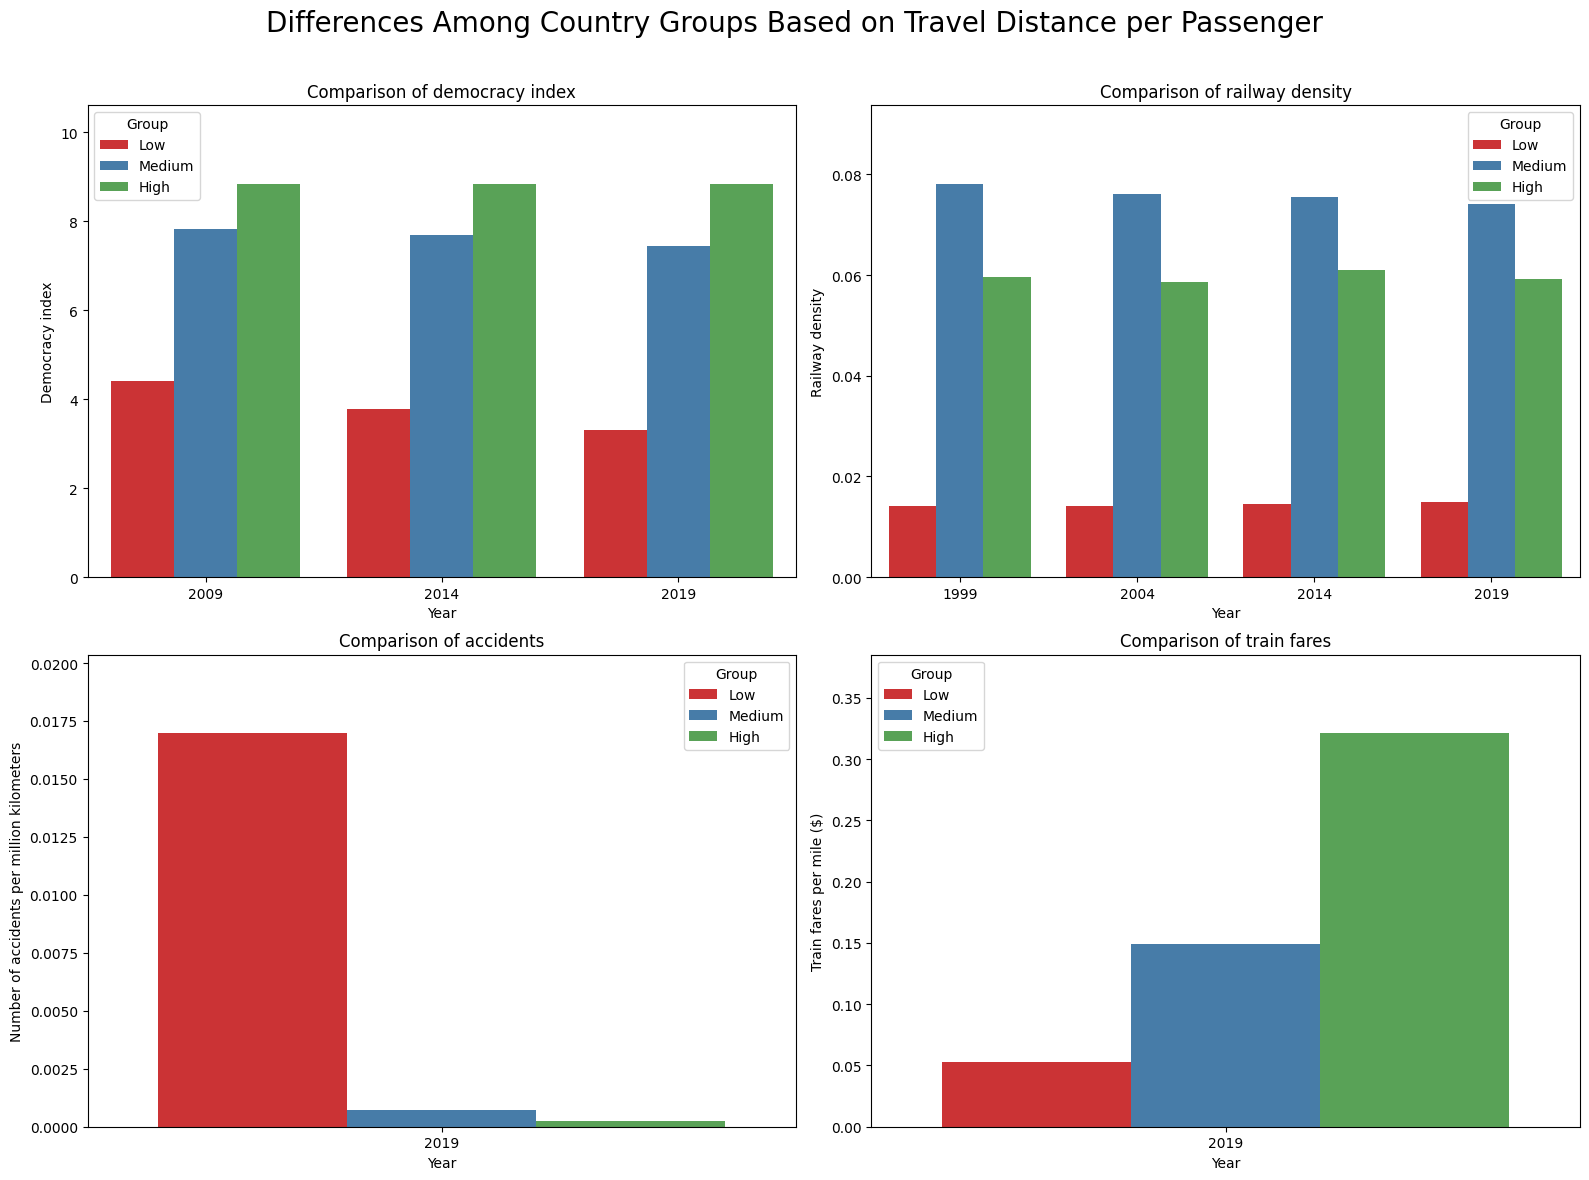

In [ ]:
# Create DataFrames
data_democracy = {
    'Year': democracy_years * 3,
    'Group': ['Low'] * len(group1_democracy_data) + ['Medium'] * len(group2_democracy_data) + ['High'] * len(group3_democracy_data),
    'Value': group1_democracy_data + group2_democracy_data + group3_democracy_data
}
df_democracy = pd.DataFrame(data_democracy)

data_linedensity = {
    'Year': line_density_years * 3,
    'Group': ['Low'] * len(group1_line_density_data) + ['Medium'] * len(group2_line_density_data) + ['High'] * len(group3_line_density_data),
    'Value': group1_line_density_data + group2_line_density_data + group3_line_density_data
}
df_linedensity = pd.DataFrame(data_linedensity)

data_safety = {
    'Year': safety_years * 3,
    'Group': ['Low'] * len(group1_safety_data) + ['Medium'] * len(group2_safety_data) + ['High'] * len(group3_safety_data),
    'Value': group1_safety_data + group2_safety_data + group3_safety_data
}
df_safety = pd.DataFrame(data_safety)

data_trainfares = {
    'Year': train_fares_years * 3,
    'Group': ['Low'] * len(group1_train_fares_data) + ['Medium'] * len(group2_train_fares_data) + ['High'] * len(group3_train_fares_data),
    'Value': group1_train_fares_data + group2_train_fares_data + group3_train_fares_data
}
df_trainfares = pd.DataFrame(data_trainfares)


# Create subplot of 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Add title
plt.suptitle("Differences Among Country Groups Based on Travel Distance per Passenger", fontsize=20)

# Plot 1: Democracy index
sns.barplot(x='Year', y='Value', hue='Group', data=df_democracy, palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title('Comparison of democracy index')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Democracy index')
max_value_democracy = df_democracy['Value'].max()
axes[0, 0].set_ylim(0, max_value_democracy * 1.2) 

# Plot 2: Railway density
sns.barplot(x='Year', y='Value', hue='Group', data=df_linedensity, palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title('Comparison of railway density')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Railway density')
max_value_linedensity = df_linedensity['Value'].max()
axes[0, 1].set_ylim(0, max_value_linedensity * 1.2) 

# Plot 3: Accidents
sns.barplot(x='Year', y='Value', hue='Group', data=df_safety, palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('Comparison of accidents')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of accidents per million kilometers')
max_value_safety = df_safety['Value'].max()
axes[1, 0].set_ylim(0, max_value_safety * 1.2) 

# Plot 4: Train fares
sns.barplot(x='Year', y='Value', hue='Group', data=df_trainfares, palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title('Comparison of train fares')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Train fares per mile ($)')
max_value_trainfares = df_trainfares['Value'].max()
axes[1, 1].set_ylim(0, max_value_trainfares * 1.2) 

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.show()

In the four graphs above, we have analyzed four different indicators that may influence train passenger kilometer levels. These indicators are grouped based on the average passenger train distance, as seen in the first graph. The three groups, each represented by a different color, correspond to low, medium, and high passenger train distances. The countries in each group are as follows:

Low: Azerbaijan, Turkey and Russia

Medium: Spain, Hungary, Japan, Poland and Czech Republic

High: Australia, Italy, France, Sweden, Norway, Finland, Great Britain, Germany and Switzerland

In the first graph, we examined the Democracy Index. It was expected that there would be a correlation between the Democracy Index and the division of countries by kilometers traveled by train since visually, there appeared to be similarities between the two. As observed, this expectation was met for the three years displayed. In the low-traveled distance group, the democracy level was notably lower, paralleling the lower number of kilometers traveled by train. 
However, in current literature there is no research on the correlation between these two. Therefore, we cannot conclude that a high level of democracy leads to a high number of passenger kilometers.

Next, the indicator analyzed was railway density, which represents the interconnectedness of a country's railway network. A dense railway network offers more travel options, making trains a favorable choice for various routes. It was expected that railway density would align with the division of countries by kilometers traveled by train, and this was evident for the low-traveled distance group (Yang et all, 2021). However, the unexpected outcome for the medium and high-traveled distance groups showed that having a more dense network did not necessarily lead to more kilometers traveled by train. This discrepancy could be attributed to factors like the availability of alternative transportation options, economic development, and cultural preferences.

The third indicator analysed was the number of accidents per million kilometers traveled. A safer railway network is expected to be more reliable, which, in turn, should enhance public trust and ridership (European union agency for railways, 2020). As anticipated, the group with lower traveled distances showed a higher number of accidents. This result aligns with the assumption that a safer railway network encourages more people to use the trains. Higher accident rates in the low-traveled distance group may discourage potential passengers and hinder the growth of train travel.

Lastly, we considered train fares in 2019 in relation to the total kilometers traveled by train passengers. Lastly, the train fares in 2019 are compared to the total travelled kilometers by train passengers. Pricing is an important factor in enhancing the attractiveness of train travel and to stimulate greater train usage by making it more accessible and affordable. It has been demonstrated in the case of Germany that lowering ticket prices resulted in a notable 25% increase in train passengers (Euronews, 2023). However, the analysis produced an unexpected result – countries with cheaper train fares did not necessarily have higher total traveled distances compared to other groups. This unexpected outcome could be due to several factors, such as the overall quality of the train service, alternative transportation options, and individual preferences. It's possible that in some countries, passengers are willing to pay higher fares for a more comfortable or efficient train service, leading to greater usage despite the cost.

## Conclusion

To answer the question how investments in railway infrastructure influence the amount of passenger kilometers, first scatterplots were made analysing this relationship. The hypothesis that investments in railway infrastructure would increase the amount of passenger kilometers, was immediately debunked by these generated animations of scatterplots throughout the years. 

However, the plot displaying the distance travelled by passengers by train throughout the years from 1999 to 2019 generated some interesting results. It was found this number of kilometers remained relatively stable throughout the years. However, the input data for investments in railway infrastructure occasionally showed some high numbers (see table xx). Therefore, these two variables are less interrelated as expected earlier. 

The line graph showing passenger train kilometers throughout 20 years somewhat divided our 17 countries in three groups based on their passenger train distance (high, medium & low). What could be possible factors, separating these three groups of countries from one another? To discover factors as such, common traits of the countries in groups, possibly relating to passenger train distance, had to be listed. Four such traits that were analysed by use of bar plots were the democracy index, railway density, number of accidents/km and train fares. In these plots each bar would represent the group of countries with low, medium or high passenger train distance (see figure xx).  

In two of these bar plots, unintuitive results were found. First, countries with high passenger train kilometers were found to also have higher train fares. Next, railway density seemed to be higher in countries with medium passenger train kilometers than for countries with high passenger train kilometers. However, because of the small sample size it is risky to derive any conclusions from those findings.  

Yet, two of these plots proved the suspicions such as countries with lower number of accidents or higher democracy index having higher passenger train distances. However, no causality is proven since a lot of lurking variables could be influencing these outcomes.  

Concluding, the presumed relation of passenger train kilometers with railway investments is found to be weak, but possibly other countries’ characteristics have a stronger relationship with this passenger train kilometers variable. For future research, it could be interesting to further analyse the relations in between these characteristics such as number of accidents or railway density to gain a more comprehensive view of what factors truly enhance passenger train kilometers.

# Data Used

1. **Amount of passenger-kilometres per country (1999-2019)** 
   - from: https://data.oecd.org/transport/passenger-transport.htm#indicator-chart 
2. **Population per country (1999-2019)**
   - from: https://ourworldindata.org/grapher/population?time=1971..latest
3. **GDP (per capita) per country (1999-2019)**
   - from: https://databank.worldbank.org/indicator/NY.GDP.PCAP.CD/1ff4a498/Popular-Indicators# and https://ourworldindata.org/grapher/gdp-per-capita-maddison?tab=table
4. **Investments in railway passenger transport per country (1999-2019)**
   - from: https://data.oecd.org/transport/infrastructure-investment.htm#indicator-chart
5. **Democracy index per country (2009, 2014, 2019)**
   - from: https://ourworldindata.org/grapher/democracy-index-eiu?time=earliest
6. **Total length of rail lines per country (1999, 2004, 2014, 2019)** 
   - from: https://databank.worldbank.org/reports.aspx?source=2&series=IS.RRS.TOTL.KM&country= 
7. **Number of Rail Accidents per Country (2019)**
   - From: https://ec.europa.eu/eurostat/databrowser/view/tran_sf_railac__custom_8020956/default/table?lang=en
   - Japan: https://www.mlit.go.jp/jtsb/statistics_rail.html
   - Russia: https://uic-stats.uic.org/
8. **Train Fares per Country (2019)**
   - From: https://www.vouchercloud.com/resources/train-prices-across-europe
   - Australia: https://transportnsw.info/regional-bookings/select-trip?from=JOC&to=BBO&dateTime=2023-12-07T00:00:00&P_0_PT=A
   - Japan: https://www.jrpass.com/farecalculator/137.950000/38.660000/5.2/iM3uAGEyAp7rmFi=


### Reference list

Euronews. (2023) DeutschlandTicket: Germany’s €49 ticket ticket pushes passenger numbers up 25% on local train services. Euronews. https://www.euronews.com/green/2023/07/31/deutschlandticket-germanys-49-ticket-pushes-passenger-numbers-up-25-on-local-train-service  

European union agency for railways (2020) Railway safety and interoperability. saferail.nl. https://www.saferail.nl/ERA/ERAPUBLICATIONS/2020_Report-Railway-Safety+Interoperability.pdf  

Yang, L., Eom, S. & Suzuki, T. (2021). Measuring railway network performance considering accessibility levels in cities worldwide. Journal of Transport Geography, vol. 96. https://doi.org/10.1016/j.jtrangeo.2021.103211. 